<a href="https://colab.research.google.com/github/sheemambabu/CMPE-258-Deep-Learning/blob/main/Assignment%203/HW_3_PartC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE-258 Deep Learning
## Homework 3
### By,
### Sheema Murugesh Babu (SJSU-ID: 015217176)



Part c.2) Using the pure tensorflow tensor data structure to build the same but with auto differentiation primitives.

# Using pure tensorflow:

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

# Generating sample data: 

In [ ]:
n_samples = 200
input_dimensions = 3
output_dimensions = 2

tf.random.set_seed(123)
X = tf.random.uniform((n_samples, input_dimensions), -1, 1)
print('Samples values of x:', X[:3])

weights_true = tf.constant([[5., 1., -5.], [-1., -8., 1.]], dtype=tf.float32)
bias_true = tf.constant([[1], [-1]], dtype=tf.float32)

y_true = tf.matmul(-6 * X ** 2, weights_true, transpose_b=True) + tf.matmul(X, weights_true, transpose_b=True) + tf.transpose(bias_true)

print('Samples values of y:', y_true[:3])
print(f'X: {X.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

Samples values of x: tf.Tensor(
[[-0.7476938   0.14550257 -0.4013734 ]
 [ 0.09236717  0.44103146  0.5779066 ]
 [-0.3846376  -0.03657794  0.30755043]], shape=(3, 3), dtype=float32)
Samples values of y: tf.Tensor(
[[-12.6514845   1.5861797]
 [  7.6096134   3.3410416]
 [ -4.10631     0.3691858]], shape=(3, 2), dtype=float32)
X: (200, 3), weights: (2, 3), bias: (2, 1), y: (200, 2)


# Function plot 3-D data with sklearn TSNE


In [ ]:
def plot_3d(title, X, y, y_pred=None):
  X_tsne = TSNE(n_components = 2, random_state=123).fit_transform(X)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tsne[:, 0], X_tsne[:, 1], y, label='y_true')
  ax.set_title(title)
  if y_pred is not None:
     ax.scatter(X_tsne[:, 0], X_tsne[:, 1], y_pred, label='y_pred', marker = '^')
  plt.legend()
  plt.show()

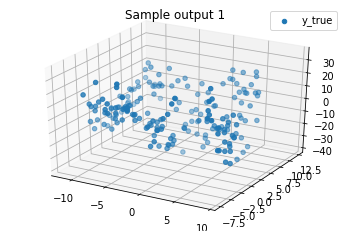

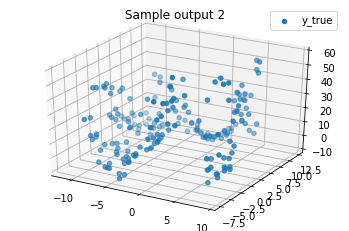

In [ ]:
plot_3d('Sample output 1', X, y_true[:,0])
plot_3d('Sample output 2', X, y_true[:,1])

# Building a neural network from scratch


In [ ]:
# Mean Squared Error

class MSE:
  def __init__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
  
  def get_error(self):
    n = self.y_true.shape[0]
    return ((self.y_pred - self.y_true) ** 2) / n
  
  def backward(self):
    return


In [ ]:
# Relu Activation layer

class Relu:
  def __init__(self):
    self.input = tf.constant([], dtype=tf.float32)

  def forward(self, input):
    self.input = input
    self.output = tf.clip_by_value(self.input, clip_value_min=0, clip_value_max=tf.float32.max)
    return self.output
  
  def backward(self, upstr_gradient):
    return 
  
  def update(self, lr):
    return

  def __str__(self):
    return 'ReLu'

In [ ]:
class Layer:
  def __init__(self, n_input_nodes=1, n_output_nodes=1, activation_func=None):
    self.n_input_nodes = n_input_nodes
    self.n_output_nodes = n_output_nodes

    self.weights = tf.Variable(tf.random.uniform((n_input_nodes, n_output_nodes), -1, 1))
    self.bias = tf.Variable(tf.random.uniform((1, 1), -1, 1))
    self.X = tf.zeros([n_input_nodes])

    # Setting the activation function
    if activation_func == 'relu':
      self.activation_func = Relu()
    else: 
      self.activation_func = None
  
  def forward(self, X):
    self.X = X
    self.Z = tf.matmul(X, self.weights) + tf.transpose(self.bias)
    if self.activation_func == None:
      return self.Z 
    else:
      return self.activation_func.forward(self.Z)

  def backward(self, dJdW, dJdb):
    self.dJdW = dJdW
    self.dJdb = dJdb

  def update(self, lr):
    self.weights = self.weights - lr * self.dJdW
    self.weights = tf.Variable(self.weights)
    self.bias = self.bias - lr * self.dJdb
    self.bias = tf.Variable(self.bias)

  def __str__(self):
    return 'Layer: ({},{}) Activation Function: {}\nInputs:\n{} \nWeights:\n{} \nBias:{}'.format(self.n_input_nodes, self.n_output_nodes, self.activation_func, self.X[:2], 
            self.weights, self.bias)

In [ ]:
class NeuralNetwork_Model:
  def __init__(self, n_inputs=3, n_hidden=[2], n_outputs=2, activation_func=None):
    self.n_inputs = n_inputs
    self.n_hidden = n_hidden
    self.n_outputs = n_outputs

    layers = [self.n_inputs] + self.n_hidden + [self.n_outputs]
    
    self.layers = []
    for i in range(len(layers[:-1])):
      if i == len(layers[:-1]) - 1:
        self.layers.append(Layer(layers[i], layers[i + 1], activation_func=None))
      else:
        self.layers.append(Layer(layers[i], layers[i + 1], activation_func))

    # Printing the network architecture
    print('Neural Network Architecture:')
    for i, layer in enumerate(self.layers):
      print('--------------------------- Layer {} ---------------------------'.format(i))
      print(layer)
    print()

  def forward(self, inputs):
    current_output = inputs
    for l in self.layers:
      current_output = l.forward(current_output)
    return current_output
  
  def backward(self, y_pred, y_true, tape):
    mse = MSE(y_pred, y_true)
    error = mse.get_error()
    print('MSE: ', mean_squared_error(y_true, y_pred))

    for layer in reversed(self.layers):
      [dJdW, dJdb] = tape.gradient(error, [layer.weights, layer.bias])
      layer.backward(dJdW, dJdb)
    
  def update(self, lr):
    for layer in self.layers:
      layer.update(lr)
  
  # Training loop over number of epochs
  def fit(self, X, y_true, epochs):
    for i in range(epochs):
      with tf.GradientTape(persistent=True) as tape:
        y_pred = self.forward(X)
        self.backward(y_pred, y_true, tape)
      self.update(lr)

  def __str__(self):
    s = [str(layer) for layer in self.layers]
    return '\n'.join(s)

# Hyperparameters

In [ ]:
# Number of Iterations
epochs = 280

# Learning rate of the algorithm
lr = 0.01

# Input and output size. i.e 3 and 2 relatively
input = X.shape[1]
output = y_true.shape[1]

print(input)
print(output)

3
2


# Training the Neural Network model with ReLU activation function

In [ ]:
model = NeuralNetwork_Model(n_inputs=input, n_hidden=[4, 3], n_outputs=output, activation_func='relu')
model.fit(X, y_true, epochs)
y_pred = model.forward(X)

err = mean_squared_error(y_true, y_pred)
print('Final MSE with ReLU: {}'.format(err))

Neural Network Architecture:
--------------------------- Layer 0 ---------------------------
Layer: (3,4) Activation Function: ReLu
Inputs:
[0. 0.] 
Weights:
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 0.21406412, -0.8693714 ,  0.18550944, -0.77581763],
       [-0.7346225 , -0.09335279, -0.6945038 ,  0.08219314],
       [ 0.48988867,  0.26814365,  0.0960238 ,  0.17559028]],
      dtype=float32)> 
Bias:<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.47292185]], dtype=float32)>
--------------------------- Layer 1 ---------------------------
Layer: (4,3) Activation Function: ReLu
Inputs:
[0. 0.] 
Weights:
<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.13541007,  0.84781647,  0.760139  ],
       [ 0.49782085, -0.20322347, -0.59163475],
       [-0.9811251 ,  0.5657482 ,  0.20415545],
       [ 0.65575075, -0.69732285,  0.30343986]], dtype=float32)> 
Bias:<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array(

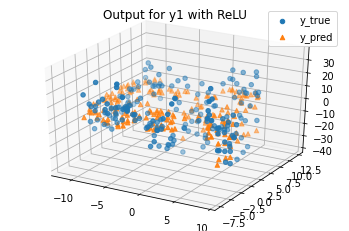

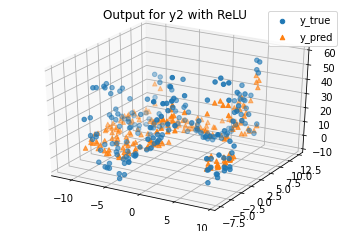

In [ ]:
plot_3d('Output for y1 with ReLU', X, y_true[:,0], y_pred[:,0])
plot_3d('Output for y2 with ReLU', X, y_true[:,1], y_pred[:,1])

# Training the Neural Network model without ReLU activation function

In [ ]:
model = NeuralNetwork_Model(n_inputs=input, n_hidden=[4, 3], n_outputs=output, activation_func=None)
model.fit(X, y_true, epochs)
y_pred = model.forward(X)

err = mean_squared_error(y_true, y_pred)
print('Final MSE without ReLU: {}'.format(err))

Neural Network Architecture:
--------------------------- Layer 0 ---------------------------
Layer: (3,4) Activation Function: None
Inputs:
[0. 0.] 
Weights:
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 0.70573235, -0.8217957 ,  0.09801078,  0.67849827],
       [ 0.13397408,  0.9828186 ,  0.6751747 , -0.0837028 ],
       [-0.4927609 ,  0.37067604,  0.5373585 ,  0.01540613]],
      dtype=float32)> 
Bias:<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.7272918]], dtype=float32)>
--------------------------- Layer 1 ---------------------------
Layer: (4,3) Activation Function: None
Inputs:
[0. 0.] 
Weights:
<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.6981747 ,  0.42996383, -0.20145941],
       [ 0.1449647 ,  0.6271126 ,  0.09839058],
       [ 0.25354695,  0.58145666, -0.96844006],
       [ 0.9819286 , -0.43416142,  0.83706903]], dtype=float32)> 
Bias:<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([

From the above, we can see that the error is larger when ReLU activation is not applied.

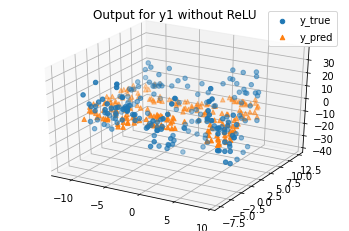

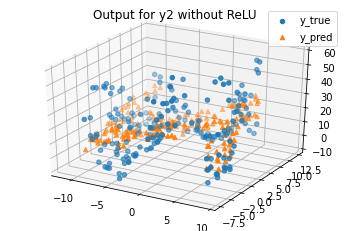

In [ ]:
plot_3d('Output for y1 without ReLU', X, y_true[:,0], y_pred[:,0])
plot_3d('Output for y2 without ReLU', X, y_true[:,1], y_pred[:,1])

## References :

1) Class Slides <br>
2) https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9 <br>
3) https://www.kdnuggets.com/2019/08/numpy-neural-networks-computational-graphs.html